## Fashion MNSIT - local
[](https://github.com/zalandoresearch/fashion-mnist)

In [20]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.2.0


In [2]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

# OR 

In [3]:
def load_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np

    """Load MNIST data from `path`"""
    labels_path = os.path.join(path,
                               '%s-labels-idx1-ubyte.gz'
                               % kind)
    images_path = os.path.join(path,
                               '%s-images-idx3-ubyte.gz'
                               % kind)

    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,
                               offset=8)

    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(labels), 784)

    return images, labels



data_dir = '/Users/rarora17/Documents/GitHub/AI-ML/AI-ML-Session-FashionMNIST/fashion-mnist/data/fashion/'
train_images, train_labels = load_mnist(data_dir, kind='train')
test_images, test_labels = load_mnist(data_dir, kind='t10k')



In [4]:
train_images = train_images.reshape(60000,28,28,1)
test_images = test_images.reshape(10000,28,28,1)

In [5]:
print(train_images.shape)
print(train_labels.shape)


(60000, 28, 28, 1)
(60000,)


In [6]:
print(test_images.shape)
print(test_labels.shape)


(10000, 28, 28, 1)
(10000,)


Ankle Boot


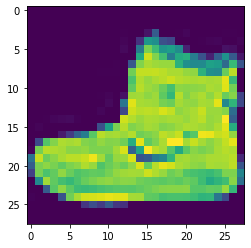

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(train_images[0].reshape(28,28))
print('Ankle Boot')


### Creating the first convolution Layer Model

In [8]:

model = keras.Sequential([
    
    # Add a 2D Convolution Layer
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),

    # Adding the Max pooling Layer
    tf.keras.layers.MaxPooling2D(2, 2),
    
    # Add a 2D Convolution Layer
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),

    # Adding the Max pooling Layer
    tf.keras.layers.MaxPooling2D(2,2),

    # Input Layer : Number of Neurons equal to the nunmber of input pixedl in an image
    keras.layers.Flatten(),

    # Hidden Layer
    keras.layers.Dense(128 , activation=tf.nn.relu),
    
    # Output Layer number of Neurons equals to number of output variables    
    keras.layers.Dense(10 , activation=tf.nn.softmax)

])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               204928    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

In [10]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [11]:
history = model.fit(train_images, train_labels, epochs=5,validation_data=(test_images, test_labels))


Epoch 1/5
1875/1875 [==============================] - 43s 23ms/step - loss: 0.5432 - accuracy: 0.8312 - val_loss: 0.4337 - val_accuracy: 0.8462
Epoch 2/5
1875/1875 [==============================] - 49s 26ms/step - loss: 0.3338 - accuracy: 0.8757 - val_loss: 0.3450 - val_accuracy: 0.8752
Epoch 3/5
1875/1875 [==============================] - 67s 36ms/step - loss: 0.2945 - accuracy: 0.8892 - val_loss: 0.3286 - val_accuracy: 0.8809
Epoch 4/5
1875/1875 [==============================] - 67s 36ms/step - loss: 0.2698 - accuracy: 0.8994 - val_loss: 0.3400 - val_accuracy: 0.8848
Epoch 5/5
1875/1875 [==============================] - 67s 36ms/step - loss: 0.2503 - accuracy: 0.9061 - val_loss: 0.3150 - val_accuracy: 0.8856


In [16]:
print(history.history)

{'loss': [0.5432057976722717, 0.3338277041912079, 0.29450011253356934, 0.269839346408844, 0.2503446638584137], 'accuracy': [0.831166684627533, 0.8756999969482422, 0.88919997215271, 0.8994166851043701, 0.9060999751091003], 'val_loss': [0.4337031841278076, 0.34496521949768066, 0.32862231135368347, 0.3399538993835449, 0.31496793031692505], 'val_accuracy': [0.8461999893188477, 0.8751999735832214, 0.8809000253677368, 0.8848000168800354, 0.8855999708175659]}


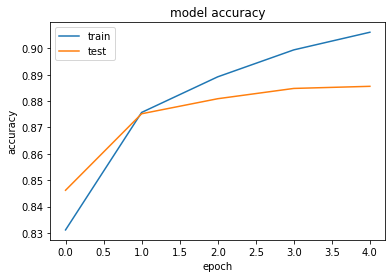

In [17]:

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [19]:
model.save('./FashioModel/1')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: ./FashioModel/1/assets


In [22]:
# import load_model
from tensorflow.keras.models import load_model
# give the path to model directory to load the model
loaded_model = load_model('FashioModel/1/')
# predict function to predict the probabilities for each class 0-9
loaded_model.predict(test_images[0:1])
# predict_classes to get the class with highest probability
loaded_model.predict_classes(test_images[0:1])

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([9])